# Aplicación de PCA (Principal Components Analysis)

In [1]:
from pandas import read_csv
data = read_csv('snd-dataset-from-plain-json.csv')
data.head()

,Duration,Loudness,LogAttackTime,Tempo,Tempo.confidence,TemporalCentroid,SingleEvent,Loop,Tonality,Tonality.confidence,DynamicRange,Note.midi,Note.frequency,Note.confidence,Genre,Mood
0,24.218412,-16.581459,0.769376,95,0.133154,0.498596,False,False,G major,0.524679,9.689243,55,197.972900,0.000000,Genre B,Mood B
1,243.983673,-16.891335,1.618665,65,0.545527,0.479576,False,False,G major,0.785114,5.247044,40,85.456451,0.000000,Genre A,Mood A
2,15.281632,-21.658251,0.582658,63,0.996905,0.492315,True,True,C minor,0.698095,1.060242,50,151.972198,0.352345,Genre B,Mood B
3,2.000000,-10.525232,-1.590209,119,0.000000,0.468918,False,False,G# minor,0.646680,0.000000,41,91.402817,0.000000,Genre A,Mood A
4,1.454150,-28.335722,-0.492548,152,0.000000,0.502481,True,False,F# minor,0.408481,0.000000,107,3984.657227,0.695633,Genre A,Mood A


In [2]:
# 16 columnas de datos
data.shape

(1017, 16)

In [3]:
# Descarto columnas que no se van a usar por ahora
# Tip: axis number (0 for rows and 1 for columns)
data = data.drop("Tempo.confidence", axis=1);
data = data.drop("Tonality.confidence", axis=1);
data = data.drop("Note.confidence", axis=1);
data = data.drop("Loop", axis=1);
data = data.drop("SingleEvent", axis=1);

data.head()

,Duration,Loudness,LogAttackTime,Tempo,TemporalCentroid,Tonality,DynamicRange,Note.midi,Note.frequency,Genre,Mood
0,24.218412,-16.581459,0.769376,95,0.498596,G major,9.689243,55,197.972900,Genre B,Mood B
1,243.983673,-16.891335,1.618665,65,0.479576,G major,5.247044,40,85.456451,Genre A,Mood A
2,15.281632,-21.658251,0.582658,63,0.492315,C minor,1.060242,50,151.972198,Genre B,Mood B
3,2.000000,-10.525232,-1.590209,119,0.468918,G# minor,0.000000,41,91.402817,Genre A,Mood A
4,1.454150,-28.335722,-0.492548,152,0.502481,F# minor,0.000000,107,3984.657227,Genre A,Mood A


In [4]:
key_to_number_list = ['A minor', 'A major', 'A# minor', 'A# major', 'B minor', 'B major', 'C minor', 'C major', 'C# minor', 'C# major', 'D minor', 'D major', 'D# minor', 'D# major','E minor', 'E major', 'F minor', 'F major', 'F# minor', 'F# major', 'G minor', 'G major','G# minor', 'G# major']

def keyToNumber(x_value):
    return [i for i,x in enumerate(key_to_number_list) if x == x_value][0]

In [5]:
# test
keyToNumber('B minor')

4

In [6]:
# Mapeo de las tonalidades 'en texto' a categorias numéricas
#data['Tonality'] = data['Tonality'].map(keyToNumber)
data = data.drop("Tonality", axis=1);

# Mapeo de Género y Mood a 0/1
#data['Genre'] = data['Genre'].map(lambda x: 1 if x=='Genre A' else 0)
#data['Mood'] = data['Mood'].map(lambda x: 1 if x=='Mood A' else 0)
data = data.drop("Genre", axis=1);
data = data.drop("Mood", axis=1);

In [7]:
data.head()

,Duration,Loudness,LogAttackTime,Tempo,TemporalCentroid,DynamicRange,Note.midi,Note.frequency
0,24.218412,-16.581459,0.769376,95,0.498596,9.689243,55,197.972900
1,243.983673,-16.891335,1.618665,65,0.479576,5.247044,40,85.456451
2,15.281632,-21.658251,0.582658,63,0.492315,1.060242,50,151.972198
3,2.000000,-10.525232,-1.590209,119,0.468918,0.000000,41,91.402817
4,1.454150,-28.335722,-0.492548,152,0.502481,0.000000,107,3984.657227


In [8]:
from sklearn.decomposition import PCA
import numpy as np
np.set_printoptions(precision=3) # se configura precisión de 3 decimales

pca = PCA()
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
pca.n_components_

8

In [10]:
# Nota: En sklearn PCA esta implementado como una descomposición SVD
# Libro hands on ML, p.214 (chapter 8)
pca = PCA(n_components = 2)
X2D = pca.fit_transform(data)
pca.explained_variance_ratio_

array([0.887, 0.11 ])

In [11]:
# Y el acumulado agregando dimensiones
np.cumsum(pca.explained_variance_ratio_)

array([0.887, 0.997])

**Observación: Con este análisis pareceria que con solo 2 dimensiones se pueden representar más del 99% de los datos, pero este análisis es incorrecto ya que los datos de entrada no fueron normalizados.**


# Escalado de los datos (normalización)

Media = 0 y varianza = 1

Referencia: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import numpy as np
import pandas as pd

X = data
X_scaled = scale(X, axis=0, with_mean=True, with_std=True, copy=True)

In [13]:
df = pd.DataFrame(X_scaled)
df.shape

(1017, 8)

In [14]:
df.head()

,0,1,2,3,4,5,6,7
0,-0.773524,0.076221,-0.188083,-0.787719,-0.041297,0.558422,-0.128382,-0.198272
1,0.463012,0.035421,0.608794,-1.935276,-0.315829,-0.270750,-1.568436,-0.423546
2,-0.823808,-0.592221,-0.363277,-2.011780,-0.131960,-1.052250,-0.608400,-0.290372
3,-0.898538,0.873622,-2.402048,0.130327,-0.469674,-1.250152,-1.472433,-0.411641
4,-0.901610,-1.471420,-1.372128,1.392641,0.014780,-1.250152,4.863804,7.383230


In [15]:
# Nota: En sklearn PCA esta implementado como una descomposición SVD
# Libro hands on ML, p.214 (chapter 8)
pca = PCA()
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
# cantidad de componentes resultantes
pca.n_components_

8

In [17]:
# estos son los autovalores (ordenados de mayor a menor)
pca.explained_variance_

array([2.091, 1.759, 1.086, 0.959, 0.877, 0.573, 0.474, 0.189])

In [18]:
avalores = pca.explained_variance_
avalores[0]/sum(avalores)

0.26112517533557206

## Variabilidad que aporta cada componente

Lo que representa en porcentaje

In [19]:
# Esto muestra la 'variabilidad' que aporta cada componente
# (lo que representa en porcentaje)
pca.explained_variance_ratio_

array([0.261, 0.22 , 0.136, 0.12 , 0.11 , 0.072, 0.059, 0.024])

### El acumulado agregando dimensiones

In [20]:
# Y el acumulado agregando dimensiones
np.cumsum(pca.explained_variance_ratio_)

array([0.261, 0.481, 0.616, 0.736, 0.846, 0.917, 0.976, 1.   ])

**Observación: Con los datos escalados, recién con 4 o 5 dimensiones tengo un porcentaje de cobertura interesante, pero necesito 6 para representar más del 90% de los datos.**

#### Ecuación del modelo



In [21]:
# componente 1
pca.components_.T[:,0]

array([-0.501, -0.134, -0.488, -0.099, -0.304, -0.274,  0.386,  0.408])

In [22]:
# componente 2 (autovector del autovalor 2)
pca.components_.T[:,1]

array([ 0.237, -0.152,  0.322,  0.135,  0.227,  0.368,  0.566,  0.54 ])

In [23]:
# componente 3
pca.components_.T[:,2]

array([ 0.008, -0.665,  0.007, -0.392, -0.375,  0.478, -0.11 , -0.15 ])

# Visualización




In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Text(0.5, 1.0, 'Representación de la proyección de los datos en 2 dimensiones')

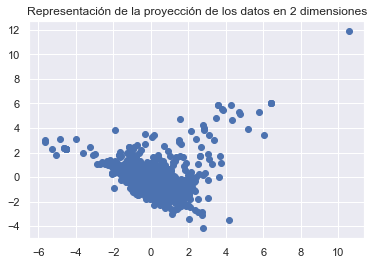

In [25]:
pca = PCA(n_components=2)
projected = pca.fit_transform(X_scaled)
plt.scatter(projected[:, 0], projected[:, 1])
plt.title("Representación de la proyección de los datos en 2 dimensiones")

## Con 3 dimensiones se representa el 60% de los datos

El acumulado por dimensiones es:
    [0.26, 0.48, 0.62, 0.74, 0.85, 0.92, 0.98, 1.]

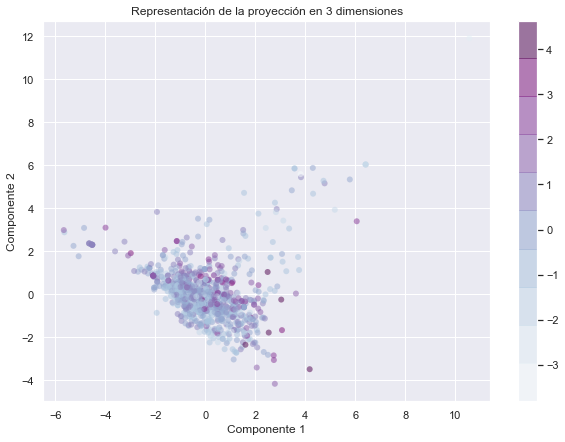

In [26]:
# 3 dimensiones representa el 60% de los datos
pca = PCA(n_components=3)
projected = pca.fit_transform(X_scaled)
plt.figure(figsize=(10,7))
plt.scatter(projected[:, 0], projected[:, 1],
            c=projected[:, 2], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('BuPu', 10))
plt.title("Representación de la proyección en 3 dimensiones")
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar();

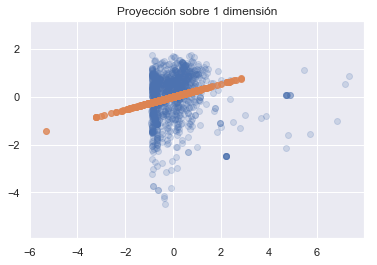

In [28]:
pca = PCA(n_components=1)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.title("Proyección sobre 1 dimensión")
plt.axis('equal');

# Conclusión parcial

Se logró reducir las dimensionalidad del dataset y realizar visualizaciones ilustrativas. Con 3 dimensiones se pueden representar aproximadamente el 60% de los datos, mientras que para lograr un porcentaje mayor al 90% se necesitan 6 (el doble).

---

**Siguiente:** [4 - Conclusión final](4%20-%20Conclusión%20final.ipynb)